In [1]:
import numpy as np
import torchvision
import torch
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms
import os
import cv2
import random

torch.manual_seed(10)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cpu for inference


In [23]:
NUM_CLASSES = 22
NUM_DATAPOINTS = 7000
num_each_class = int(np.ceil(NUM_DATAPOINTS / NUM_CLASSES))
PATH = 'MLRSNet Dataset\\MLRSNet for Semantic Scene Understanding\\Images'
MODEL_PATH = "MLRSNet Dataset\\Final_outputs\\Perfect Model\\model_pretrained_epochs15_lr0.001.pth"
CLASSES = ['baseball_diamond', 'basketball_court', 'beach','commercial_area', 'dense_residential_area', 'desert', 'farmland', 'forest', 'freeway', 'ground_track_field', 'harbor&port', 'intersection', 'island', 'lake', 'parking_lot', 'railway', 'river', 'snowberg', 'sparse_residential_area', 'stadium', 'swimmimg_pool','tennis_court']

In [35]:
#PRIMARY MODEL
model = torchvision.models.efficientnet_b2(weights=None)
for params in model.parameters():
        params.requires_grad = False
model.trainable = False
model.classifier[1] = nn.Linear(in_features=1408, out_features=NUM_CLASSES)
checkpoint = torch.load(MODEL_PATH)
model.load_state_dict(checkpoint['model_state_dict'])
transform = transforms.Compose([transforms.ToPILImage(), transforms.Resize((224,224)), transforms.ToTensor()])

model.eval()
correct_count = 0
for i in range(50):
        FOLDER = CLASSES[random.randrange(NUM_CLASSES)]
        if FOLDER == 'swimmimg_pool':
                FOLDER = 'swimming_pool'
        FOLDER_PATH = f"{PATH}\\{FOLDER}"
        FILENAME = os.listdir(FOLDER_PATH)[random.randrange(200,1500)] #num_each_class gives within test set. randrange(1000,2000) gives new test images never seen in model
        # print("True Label: ", FILENAME)
        IMG_PATH = f"{PATH}\\{FOLDER}\\{FILENAME}"

        img = Image.open(IMG_PATH) 
        

        image = cv2.imread(IMG_PATH) # Read the image and create a copy.
        orig_image = image.copy()
        image = transform(image)
        image = torch.unsqueeze(image, 0)
        outputs = model(image)
        outputs = outputs.detach().numpy()
        pred_class_name = CLASSES[np.argmax(outputs[0])]
        # print("Prediction: ", pred_class_name)
        # display(img)
        if FILENAME[:-10] != pred_class_name:
                print(FILENAME, pred_class_name)
                # display(img)
        else:
                correct_count += 1
print("Correct Prediction Count: ", correct_count)

tennis_court_00686.jpg basketball_court
sparse_residential_area_02331.jpg baseball_diamond
lake_01088.jpg snowberg
snowberg_00731.jpg beach
commercial_area_01487.jpg intersection
parking_lot_00953.jpg commercial_area
desert_00279.jpg beach
harbor&port_00783.jpg basketball_court
Correct Prediction Count:  42


True Label:  beach_00216.jpg
Prediction:  beach


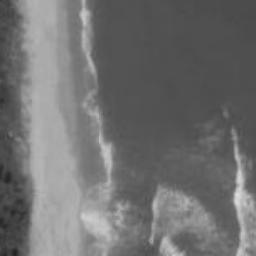

True Label:  sparse_residential_area_00931.jpg
Prediction:  sparse_residential_area


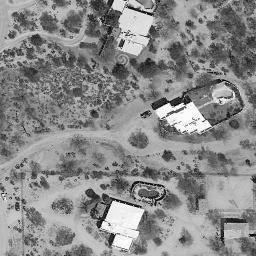

True Label:  island_00231.jpg
Prediction:  island


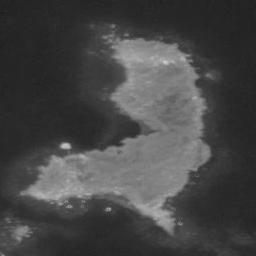

True Label:  forest_01024.jpg
Prediction:  forest


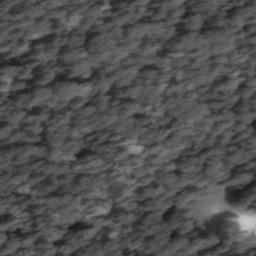

True Label:  railway_00002.jpg
Prediction:  railway


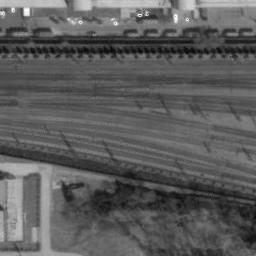

In [24]:
#AMF PRIMARY MODEL
NUM_CLASSES = 22
NUM_DATAPOINTS = 7000
num_each_class = int(np.ceil(NUM_DATAPOINTS / NUM_CLASSES))
PATH = 'MLRSNet Dataset\\MLRSNet for Semantic Scene Understanding\\AMFImages'
MODEL_PATH = "MLRSNet Dataset\\Final_outputs\\Perfect Model w AMF\\model_pretrained_epochs15_lr0.001_AMF.pth"
CLASSES = ['baseball_diamond', 'basketball_court', 'beach', 'commercial_area', 'dense_residential_area', 'desert', 'farmland', 'forest', 'freeway', 'ground_track_field', 'harbor&port', 'intersection', 'island', 'lake', 'parking_lot', 'railway', 'river', 'snowberg', 'sparse_residential_area', 'stadium', 'swimming_pool','tennis_court']

model = torchvision.models.efficientnet_b2(weights=None)
for params in model.parameters():
        params.requires_grad = False
model.trainable = False
model.classifier[1] = nn.Linear(in_features=1408, out_features=NUM_CLASSES) ##########################AP1408/1280############################
checkpoint = torch.load(MODEL_PATH)
model.load_state_dict(checkpoint['model_state_dict'])
transform = transforms.Compose([transforms.ToPILImage(), transforms.Resize((224,224)), transforms.ToTensor()])

model.eval()
for i in range(5):
        FOLDER = CLASSES[random.randrange(NUM_CLASSES)]
        FOLDER_PATH = f"{PATH}\\{FOLDER}"
        FILENAME = os.listdir(FOLDER_PATH)[random.randrange(num_each_class)]
        print("True Label: ", FILENAME)
        IMG_PATH = f"{PATH}\\{FOLDER}\\{FILENAME}"

        img = Image.open(IMG_PATH) 

        image = cv2.imread(IMG_PATH) # Read the image and create a copy.
        orig_image = image.copy()
        image = transform(image)
        image = torch.unsqueeze(image, 0)
        outputs = model(image)
        outputs = outputs.detach().numpy()
        pred_class_name = CLASSES[np.argmax(outputs[0])]
        print("Prediction: ", pred_class_name)
        display(img)